In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading the dataset
data = pd.read_csv("/content/drive/MyDrive/datasets/stress.csv")

# Display the first 5 rows of the dataset
print(data.head())


          subreddit post_id sentence_range  \
0              ptsd  8601tu       (15, 20)   
1        assistance  8lbrx9         (0, 5)   
2              ptsd  9ch1zh       (15, 20)   
3     relationships  7rorpp        [5, 10]   
4  survivorsofabuse  9p2gbc         [0, 5]   

                                                text     id  label  \
0  He said he had not felt that way before, sugge...  33181      1   
1  Hey there r/assistance, Not sure if this is th...   2606      0   
2  My mom then hit me with the newspaper and it s...  38816      1   
3  until i met my new boyfriend, he is amazing, h...    239      1   
4  October is Domestic Violence Awareness Month a...   1421      1   

   confidence  social_timestamp  social_karma  syntax_ari  ...  \
0         0.8        1521614353             5    1.806818  ...   
1         1.0        1527009817             4    9.429737  ...   
2         0.8        1535935605             2    7.769821  ...   
3         0.6        1516429555       

In [3]:
# Checking for missing values
print(data.isnull().sum())


subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [4]:
# Importing required libraries
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

# Setting up English stopwords and a stemmer
stopword = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

# Cleaning function
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)  # Remove content inside brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\w*\d\w*', '', text)  # Remove words with numbers
    text = [word for word in text.split(' ') if word not in stopword]  # Remove stopwords
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]  # Apply stemming
    text = " ".join(text)
    return text

# Applying the cleaning function to the text column
data["text"] = data["text"].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


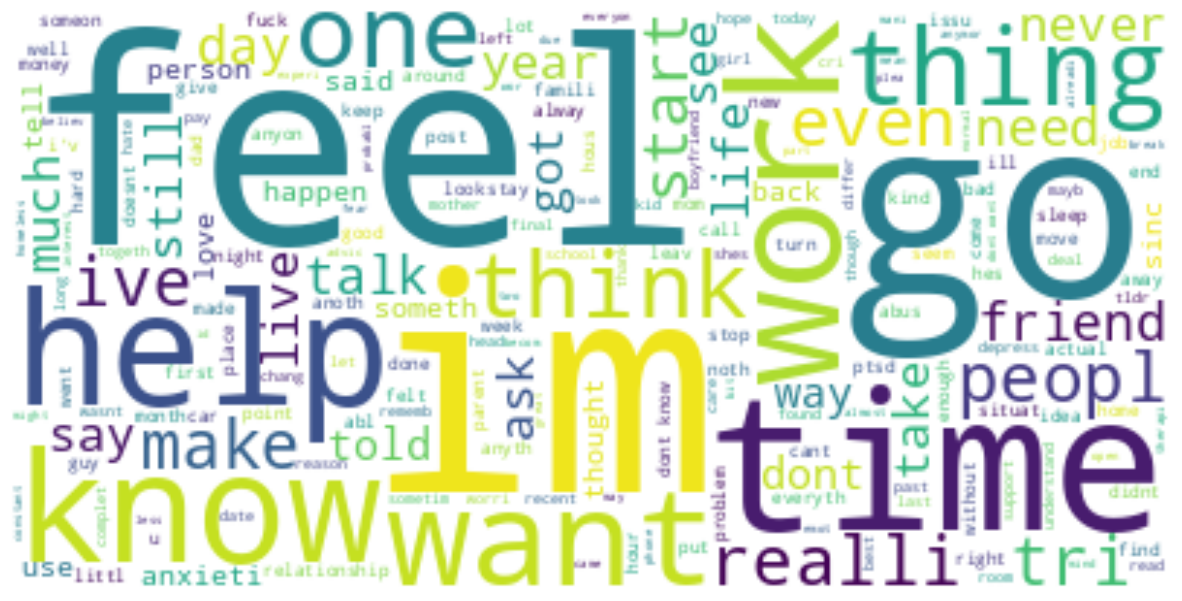

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Creating a word cloud
text = " ".join(i for i in data.text)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

# Displaying the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [6]:
# Mapping labels
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})

# Selecting relevant columns
data = data[["text", "label"]]
print(data.head())


                                                text      label
0  said felt way sugget go rest trigger ahead you...     Stress
1  hey rassist sure right place post goe  im curr...  No Stress
2  mom hit newspap shock would know dont like pla...     Stress
3  met new boyfriend amaz kind sweet good student...     Stress
4  octob domest violenc awar month domest violenc...     Stress


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Splitting features and labels
x = np.array(data["text"])
y = np.array(data["label"])

# Vectorizing the text data
cv = CountVectorizer()
X = cv.fit_transform(x)

# Splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)


In [17]:
from sklearn.naive_bayes import BernoulliNB

# Training the model
model = BernoulliNB()
model.fit(xtrain, ytrain)


BernoulliNB()

In [ ]:
# Testing the model
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)
